In [15]:
# Adding src module to path
import sys
import os
from tqdm import tqdm
module_path = os.path.abspath(os.path.join('../..'))

print(f"module path {module_path}")
if module_path not in sys.path:
    sys.path.append(module_path)


module path C:\Users\overs\Python\Master-Thesis-Project


In [2]:
# general imports
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

import src.utils as utils
from src.nqs import RBM, IsingHamiltonian, IsingHamiltonianReduced, RandomHamiltonian


## Testing hidden node accuracy

Training several RBMs with increasing number of visible nodes. For each RBM we test how increasing the number of hidden nodes affects accuracy.

In [3]:

#Initializing starting values 
visible_size = 2
seed = 42

#Finding true ground state energy and displaying it
np.random.seed(seed)



energy_4_list = []
energy_8_list = []


time_list =[]
n_hid_list =[]



In [4]:
energy_list=[]
true_energy_list=[]
time_list = []

for v in [4,5,6]:
    
            
    np.random.seed(seed)

    gamma = gamma = utils.random_gamma(v)
    rh = RandomHamiltonian
    ih = IsingHamiltonian(gamma=gamma)
    ihr = IsingHamiltonianReduced(gamma=gamma)
    
    eig,_ = np.linalg.eigh(ih)
    E_truth = np.min(eig)
    true_energy_list.append(E_truth)

    
    energies=[]
    times = []
    
    for i in tqdm(range(1,5)): 
        visible_size = v
        hidden_size = i
        
        np.random.seed(seed)

        rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=ihr, walker_steps=1000)
        
        energies.append(rbm.train(iterations=1000, lr=0.01, print_energy=False))
        time_list.append(rbm.train.run_time)
        
    
        # Print loop    
    
    
    energy_list.append(energies)
    time_list.append(times)



 25%|████████████████████▊                                                              | 1/4 [03:24<10:12, 204.22s/it]

func:train args:[(<src.nqs.RBM object at 0x0000028F7C6985E0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 204.22472500801086 sec


 50%|█████████████████████████████████████████▌                                         | 2/4 [07:13<07:17, 218.97s/it]

func:train args:[(<src.nqs.RBM object at 0x0000028F7C698880>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 229.2943971157074 sec


 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [11:12<03:48, 228.27s/it]

func:train args:[(<src.nqs.RBM object at 0x0000028F7C698970>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 239.3309645652771 sec


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [15:28<00:00, 232.22s/it]


func:train args:[(<src.nqs.RBM object at 0x0000028F7C698730>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 256.0358576774597 sec


 25%|████████████████████▊                                                              | 1/4 [04:02<12:08, 242.96s/it]

func:train args:[(<src.nqs.RBM object at 0x0000028F7C6989A0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 242.96475172042847 sec


 50%|█████████████████████████████████████████▌                                         | 2/4 [08:25<08:29, 254.58s/it]

func:train args:[(<src.nqs.RBM object at 0x0000028F7C698520>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 262.7155191898346 sec


 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [12:50<04:19, 259.32s/it]

func:train args:[(<src.nqs.RBM object at 0x0000028F7C698B20>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 264.95870661735535 sec


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [17:17<00:00, 259.40s/it]


func:train args:[(<src.nqs.RBM object at 0x0000028F7C6989A0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 266.9479432106018 sec


 25%|████████████████████▊                                                              | 1/4 [04:02<12:06, 242.12s/it]

func:train args:[(<src.nqs.RBM object at 0x0000028F7C698580>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 242.11953115463257 sec


 50%|█████████████████████████████████████████▌                                         | 2/4 [08:19<08:21, 250.88s/it]

func:train args:[(<src.nqs.RBM object at 0x0000028F7BFC09D0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 257.0104286670685 sec


 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [12:38<04:14, 254.57s/it]

func:train args:[(<src.nqs.RBM object at 0x0000028F7C698520>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 258.9574251174927 sec


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [17:02<00:00, 255.60s/it]

func:train args:[(<src.nqs.RBM object at 0x0000028F7C698A90>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 264.3148424625397 sec


<IPython.core.display.Javascript object>


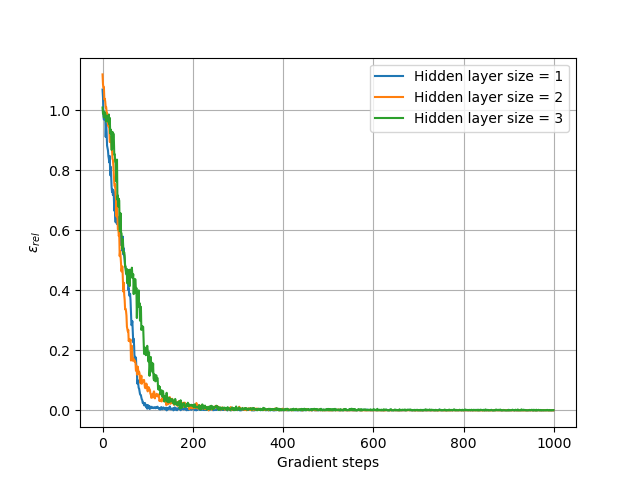

In [26]:

labels = [f"Hidden layer size = {i}" for i in range(1,5)]



plt.figure(0)

for energy in energy_list[0][0:3]:
    plt.plot([utils.relative_error(true_energy_list[0], e) for e in energy])
    


plt.xlabel("Gradient steps")
plt.ylabel(r'$\epsilon_{rel}$')
plt.grid()
plt.legend(labels)








In [27]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}"

plt.savefig(f"{path}/HiddenIpact4V.pdf")

<IPython.core.display.Javascript object>


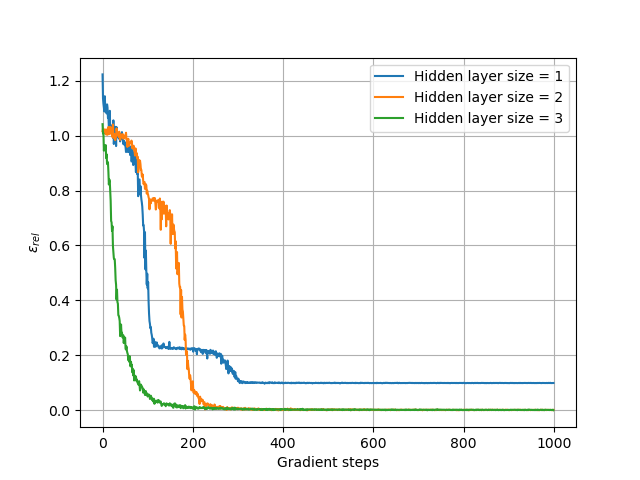

In [28]:
plt.figure(1)
for energy in energy_list[1][0:3]:
    plt.plot((energy-true_energy_list[1])/np.abs(true_energy_list[1]))

    
plt.xlabel("Gradient steps")
plt.ylabel(r'$\epsilon_{rel}$')
plt.legend(labels)

plt.grid()



In [29]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}"

plt.savefig(f"{path}/HiddenIpact5V.pdf")

<IPython.core.display.Javascript object>


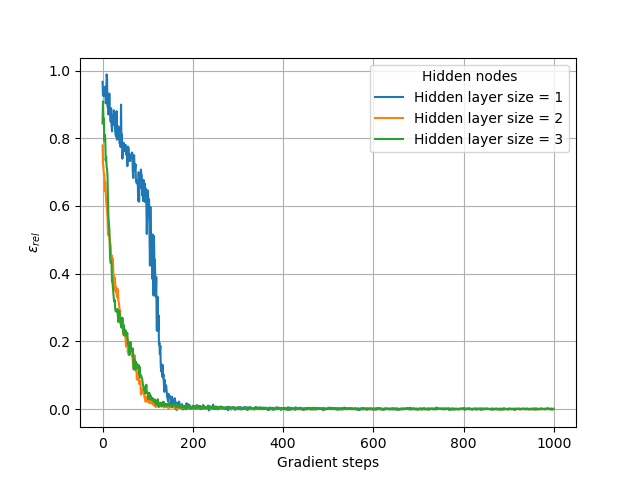

In [24]:

plt.figure(2) 
for energy in energy_list[2][0:3]:
    plt.plot((energy-true_energy_list[2])/np.abs(true_energy_list[2]))


plt.xlabel("Gradient steps")
plt.ylabel(r'$\epsilon_{rel}$')
plt.legend(labels, title = 'Hidden nodes')

plt.grid()


In [19]:

# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}"

plt.savefig(f"{path}/HiddenImpact6V.pdf")